In [65]:
import numpy as np
import pandas as pd
from numpy import linalg
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)


In [4]:
dataset = pd.read_csv('wdbc_data.csv',header=None)

In [6]:
dataset = dataset.drop([0], axis= 1)

In [7]:
dataset[1] = dataset[1].replace(["M"], 1)
dataset[1] = dataset[1].replace(["B"], -1)

In [38]:
X = dataset.drop([1], axis =1)

y = dataset[1]

X_train = X.iloc[0:300]
y_train = y.iloc[0:300]
X_test = X.iloc[300:569]
y_test = y.iloc[300:569]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1779177)


In [78]:
X_class, y_class = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1779177, n_clusters_per_class=1)
y_class = np.where(y_class == 0, -1, 1)


X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=1)

y_circles = np.where(y_circles == 0, -1, 1)



X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=0)

y_moons = np.where(y_moons == 0, -1, 1)


In [40]:
df_X_circles = pd.DataFrame(data=X_circles)
df_y_circles = pd.DataFrame(data=y_circles)

df_X_moons = pd.DataFrame(data=X_moons)
df_y_moons = pd.DataFrame(data=y_moons)

df_X_class = pd.DataFrame(data=X_class)
df_y_class = pd.DataFrame(data=y_class)

In [20]:
class Adaboost:
    
    def __init__(self, ):
        
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None 
        
    
    
    def fit(self, X, y, iter_n, depth):
        
        n_samples, n_features = X.shape
        
        w = np.full(n_samples, (1 / n_samples))
        
        alphas = []
        models = []
        #DBZ = 1e-8
        
        for t in range(iter_n):
            
            stump = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
            MEM_DF = pd.DataFrame.copy(y)
            model = stump.fit(X,y,sample_weight=w)
            
            models.append(model)
            predictions = model.predict(X)
            
            missclassfied = w[y!= predictions]
            
            err = sum (missclassfied)
            
            alpha = 0.5 * np.log((1.0-err)/err)
            
            alphas.append(alpha)
            
            w = w * np.exp(-alpha * predictions*y)
            w = w/np.sum(w)
            
        self.alphas = alphas
        self.models = models
        
        return self
    
    
    def err_show(self, X, Y ):
        
        pred = Adaboost.predict(self,X)
        missclassification = np.where(pred != Y,1,0)
        err_r = sum(missclassification)/len(missclassification)
    
        return err_r
            
    def predict(self, X):
        
        predictions = []
        
        for model, alpha in zip (self.models, self.alphas):
            
            prediction = alpha * model.predict(X)
            
            predictions.append(prediction)
            
        y_pred = np.sign(np.sum(np.array(predictions),axis=0))
        
        
        
        
        return y_pred

In [42]:
ada = Adaboost()

In [44]:
pred_test_ada = ada.fit(X_train, y_train, 100, 1)

In [45]:
pred_scratch = ada.predict(X_test)

In [46]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1779177)

In [47]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1779177)

In [48]:
pred_sklearn = clf.predict(X_test)

In [49]:
#print(classification_report(y_test, pred_scratch))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       203
           1       0.88      0.98      0.93        66

    accuracy                           0.96       269
   macro avg       0.94      0.97      0.95       269
weighted avg       0.97      0.96      0.96       269



In [50]:
#print(classification_report(y_test, pred_sklearn))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.98       203
           1       0.89      0.98      0.94        66

    accuracy                           0.97       269
   macro avg       0.94      0.97      0.96       269
weighted avg       0.97      0.97      0.97       269



In [71]:
print("accuracy for Adaboost python is", accuracy_score(y_test, pred_scratch))
# accuracy_score(y_test, pred_scratch)

accuracy for Adaboost python is 0.9628252788104089


In [72]:
print("accuracy for Adaboost sklearn is", accuracy_score(y_test, pred_sklearn))


accuracy for Adaboost sklearn is 0.966542750929368


In [79]:
clf_SVM_C1000 = SVC(C = 1000, kernel = 'linear', tol=0.0001,  max_iter=-1)
clf_SVM_C1000.fit(X_train, y_train) 
predicted_SVM_C1000 = clf_SVM_C1000.predict(X_test)
print("accuracy for svm with C = 1000 is", accuracy_score(y_test, predicted_SVM_C1000))



accuracy for svm with C = 1000 is 0.9702602230483272


In [76]:
clf_SVM_C1 = SVC(C = 1, kernel = 'linear', tol=0.0001,  max_iter=-1)
clf_SVM_C1.fit(X_train, y_train) 
predicted_SVM_C1 = clf_SVM_C1.predict(X_test)
print("accuracy for svm with C = 1 is", accuracy_score(y_test, predicted_SVM_C1))

# accuracy_score(y_test, predicted_SVM_C10)

accuracy for svm with C = 1 is 0.9553903345724907


In [77]:
print("uncommnet the next lines for adaboost with varying depth analysis")

uncommnet the next lines for adaboost with varying depth analysis


In [51]:
# from sklearn import metrics

# estimators = list(range(1, 300, 3))

# abc_scores_train = []
# abc_scores_test = []
# abc_train_err = []
# abc_test_err = []
# depth_2_score_train = []
# depth_2_score_test = []
# depth_2_train_err = []
# depth_2_test_err = []
# depth_3_score_train = []
# depth_3_score_test = []
# depth_3_train_err = []
# depth_3_test_err = []

# for n_est in estimators:
#     ABC = Adaboost()
#     ABC.fit(X_train, y_train, n_est,1 )
#     y_pred_train = ABC.predict(X_train)
#     scores_train = metrics.accuracy_score(y_train, y_pred_train)
#     err_train = ABC.err_show(X_train,y_train)
#     y_pred_test = ABC.predict(X_test)
#     score_test = metrics.accuracy_score(y_test, y_pred_test)
#     err_test = ABC.err_show(X_test,y_test)
    
    
#     abc_scores_train.append(scores_train)
#     abc_scores_test.append(score_test)
#     abc_train_err.append(err_train)
#     abc_test_err.append(err_test)
    
    
    

    
    
# for n_est in estimators:
#     ABC = Adaboost()
#     ABC.fit(X_train, y_train, n_est,2 )
#     y_pred_train = ABC.predict(X_train)
#     scores_train = metrics.accuracy_score(y_train, y_pred_train)
#     err_train = ABC.err_show(X_train,y_train)
#     y_pred_test = ABC.predict(X_test)
#     score_test = metrics.accuracy_score(y_test, y_pred_test)
#     err_test = ABC.err_show(X_test,y_test)
    
    
#     depth_2_score_train.append(scores_train)
#     depth_2_score_test.append(score_test)
#     depth_2_train_err.append(err_train)
#     depth_2_test_err.append(err_test)
    
    

    
    
# for n_est in estimators:
#     ABC = Adaboost()
#     ABC.fit(X_train, y_train, n_est,3 )
#     y_pred_train = ABC.predict(X_train)
#     scores_train = metrics.accuracy_score(y_train, y_pred_train)
#     err_train = ABC.err_show(X_train,y_train)
#     y_pred_test = ABC.predict(X_test)
#     score_test = metrics.accuracy_score(y_test, y_pred_test)
#     err_test = ABC.err_show(X_test,y_test)
    
    
#     depth_3_score_train.append(scores_train)
#     depth_3_score_test.append(score_test)
#     depth_3_train_err.append(err_train)
#     depth_3_test_err.append(err_test)
    



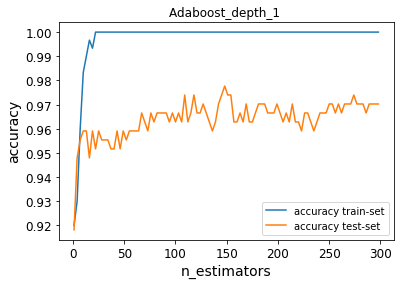

In [55]:
# # plot
# plt.plot(estimators, abc_scores_train, label = 'accuracy train-set')
# plt.plot(estimators, abc_scores_test, label = 'accuracy test-set')
# plt.title("Adaboost_depth_1 ")
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_1", dpi=300,  bbox_inches='tight')
# plt.show()

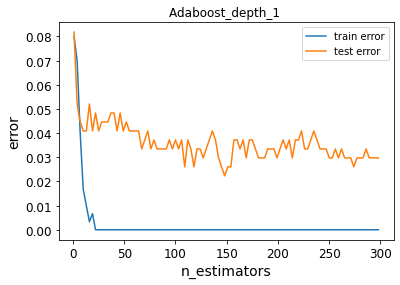

In [56]:
# plot
# plt.plot(estimators, abc_train_err, label='train error')
# plt.plot(estimators, abc_test_err, label='test error')
# plt.title("Adaboost_depth_1 ")
# plt.xlabel('n_estimators')
# plt.ylabel('error')
# plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_1", dpi=300,  bbox_inches='tight')
# plt.show()

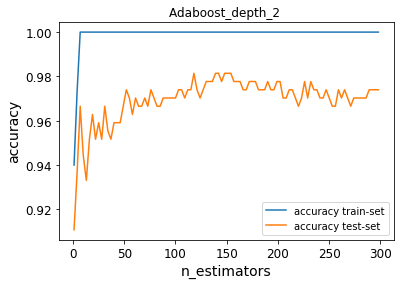

In [57]:
# plot
# plt.plot(estimators, depth_2_score_train, label = 'accuracy train-set')
# plt.plot(estimators, depth_2_score_test, label = 'accuracy test-set')
# plt.title("Adaboost_depth_2 ")
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
# plt.show()

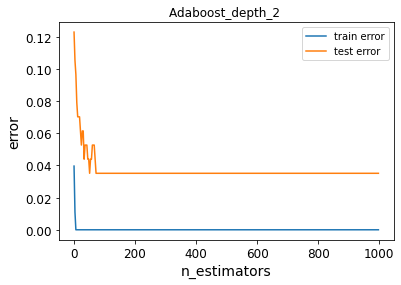

In [122]:
# plot
# plt.plot(estimators, depth_2_train_err, label='train error')
# plt.plot(estimators, depth_2_test_err, label='test error')
# plt.title("Adaboost_depth_2 ")
# plt.xlabel('n_estimators')
# plt.ylabel('error')
# plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
# plt.show()

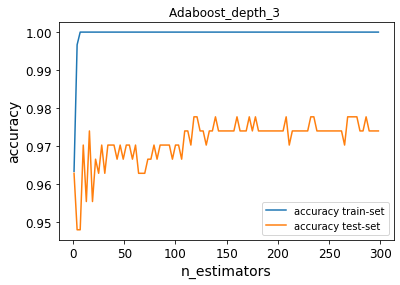

In [58]:
# plot
# plt.plot(estimators, depth_3_score_train, label = 'accuracy train-set')
# plt.plot(estimators, depth_3_score_test, label = 'accuracy test-set')
# plt.title("Adaboost_depth_3 ")
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
# plt.show()

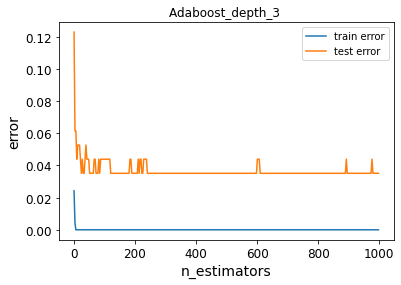

In [124]:
# plot
# plt.plot(estimators, depth_3_train_err, label='train error')
# plt.plot(estimators, depth_3_test_err, label='test error')
# plt.title("Adaboost_depth_3 ")
# plt.xlabel('n_estimators')
# plt.ylabel('error')
#plt.ylim([0.85, 1])
# plt.legend()
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
# plt.show()

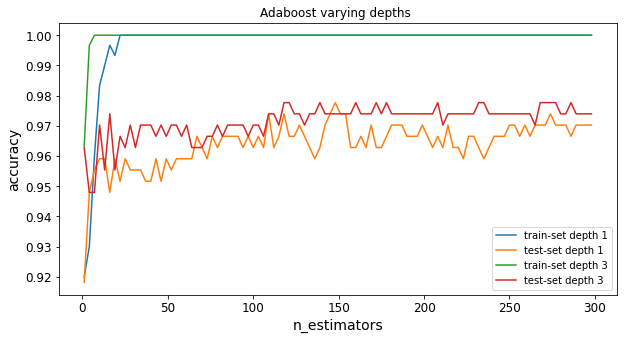

In [64]:
# plt.figure(figsize=(10,5))
# plt.plot(estimators, abc_scores_train, label = 'train-set depth 1')
# plt.plot(estimators, abc_scores_test, label = 'test-set depth 1')
#plt.plot(estimators, depth_2_score_train, label = 'train-set depth 2')
#plt.plot(estimators, depth_2_score_test, label = 'test-set depth 2')
# plt.plot(estimators, depth_3_score_train, label = 'train-set depth 3')
# plt.plot(estimators, depth_3_score_test, label = 'test-set depth 3')
# plt.title("Adaboost varying depths ")
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.legend()
#plt.ylim([0.85, 1])
# plt.savefig("Adaboost_depth_2", dpi=350,  bbox_inches='tight')
# plt.show()

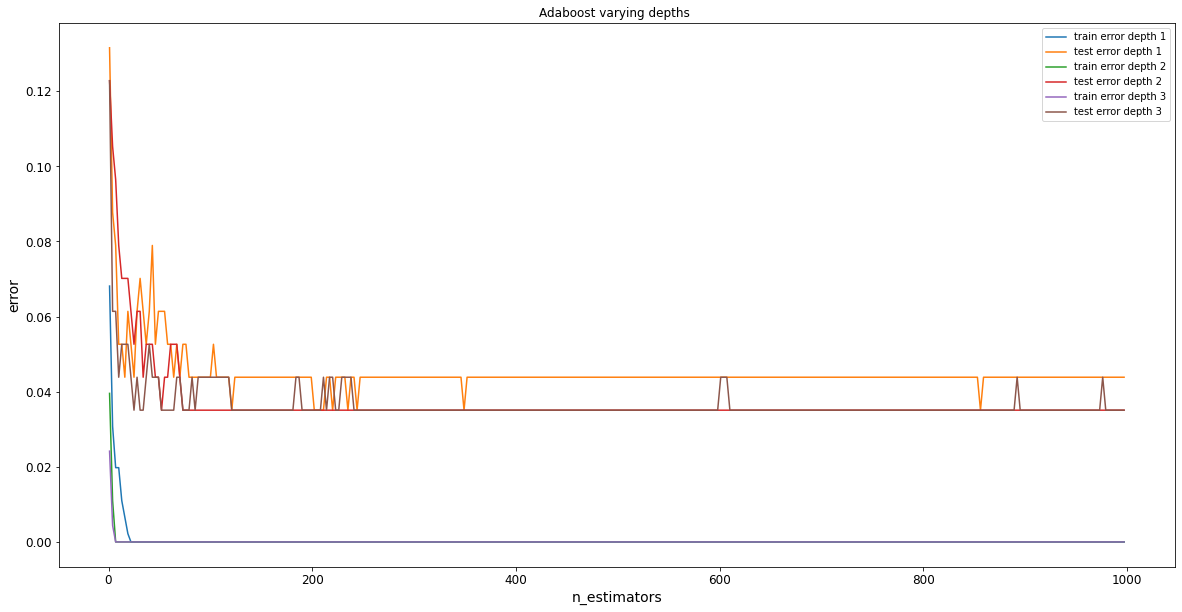

In [126]:
# plt.figure(figsize=(20,10))
# plt.plot(estimators, abc_train_err, label='train error depth 1')
# plt.plot(estimators, abc_test_err, label='test error depth 1')
# plt.plot(estimators, depth_2_train_err, label='train error depth 2')
# plt.plot(estimators, depth_2_test_err, label='test error depth 2')
# plt.plot(estimators, depth_3_train_err, label='train error depth 3')
# plt.plot(estimators, depth_3_test_err, label='test error depth 3')
# plt.title("Adaboost varying depths ")
# plt.xlabel('n_estimators')
# plt.ylabel('error')
# plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
# plt.show()

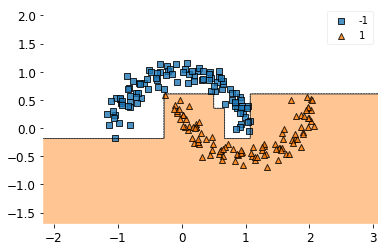

In [127]:
# ada1 = Adaboost()

# pred_test1_ada1 = ada1.fit(df_X_moons, df_y_moons.T.squeeze(), 200, 1)

# fig = plot_decision_regions(df_X_moons.to_numpy(), (df_y_moons.T.squeeze()).to_numpy(), clf=pred_test1_ada1)



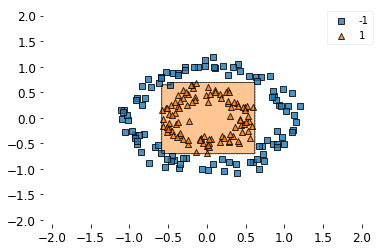

In [128]:
# ada2 = Adaboost()

# pred_test2_ada2 = ada1.fit(df_X_circles, df_y_circles.T.squeeze(), 200, 1)

# fig = plot_decision_regions(df_X_circles.to_numpy(), (df_y_circles.T.squeeze()).to_numpy(), clf=pred_test1_ada1)

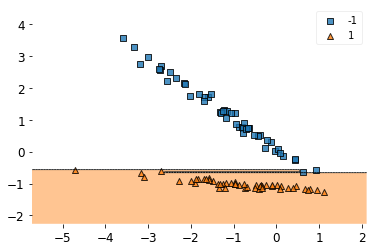

In [129]:
# ada2 = Adaboost()

# pred_test2_ada2 = ada1.fit(df_X_class, df_y_class.T.squeeze(), 200, 1)

# fig = plot_decision_regions(df_X_class.to_numpy(), (df_y_class.T.squeeze()).to_numpy(), clf=pred_test1_ada1)